## Problem 2.24

In [180]:
# TODO: Add your imports
import numpy as np
import matplotlib.pyplot as plt


### 2.24 (B)

In [181]:
def target_function(x):
    # TODO: implement target function
    y = x**2
    return y

In [182]:
def gdFunc(x, x1, x2):
    a = x1 + x2
    b = -x1 * x2
    return a * x + b


In [183]:
def run_numerical_experiment(nDataSamples):
    # TODO: implement experiment  that you could run to determine (numerically) 𝑔(𝑥), 𝐸out , bias and var.
    x = np.linspace(-1, 1, nDataSamples)
    bias = []
    var = []
    Eout = []
    y_all = []
    g_bar_all = np.zeros(nDataSamples)

    for xi in x:
        Eout_temp = []
        gdfuncs = []
        for i in range(nDataSamples):  
            y = target_function(xi) # target function value
            x1,x2 = np.random.uniform(-1, 1, 2) # random x1, x2
            gd = gdFunc(xi, x1, x2) # hypothesis function value
            gdfuncs.append(gd) # store hypothesis function values for variance and gbar calculation
            Eout_temp.append((y - gd)**2) 
        gbar = np.mean(gdfuncs) # calculate gbar = summation of hypothesis function values / nDataSamples
        bias.append((y - gbar)**2) # calculate bias = (target function value - gbar)**2
        var.append(np.mean((gdfuncs - gbar)**2)) # calculate variance = summation of (hypothesis function value - gbar)**2 / nDataSamples
        Eout.append(np.mean(Eout_temp)) # calculate Eout = summation of (target function value - hypothesis function value)**2 / nDataSamples

        # for plotting
        y_all.append(y) # store target function values for plotting
        g_bar_all+=gbar # store gbar values for plotting

    g_bar_all /= nDataSamples 

    plt.plot(x, y_all, label='f(x)')
    plt.plot(x, g_bar_all, label='g_bar(x)')
    # plot some hypothesis lines for visualization 
    for i in range(5):
        x1,x2 = np.random.uniform(-1, 1, 2)
        plt.plot(x, gdFunc(x, x1,x2), color='yellow')
        # put concatenate label for all hypothesis lines as one label
        if i == 0:
            plt.plot(x, gdFunc(x, x1,x2), color='yellow', label='hypothesis lines g(x))')


    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()
    return np.mean(var), np.mean(bias), np.mean(Eout)

### 2.24 (C)

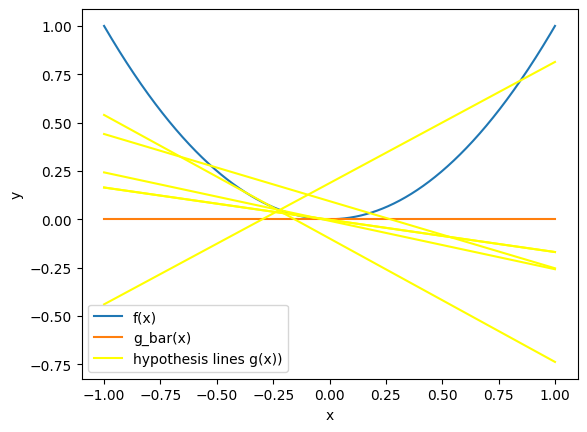

variance:  0.33314982905897855
bias:  0.2004286721205777
Eout:  0.5335785011795563
bias + variance:  0.5335785011795562


In [184]:
# TODO: Run experiment and calculate bias and variance (+ plotting)
nDataSamples = 1000
variance, bias, Eout= run_numerical_experiment(nDataSamples)

print("variance: ", variance)
print("bias: ", bias)
print("Eout: ", Eout)
print("bias + variance: ", bias+variance)

# Conclude:
# the calculated values are similar to analytical results.
# The bias+variance is close to the value calculated directly for out-of-sample error.

### 2.24 (E)

In [185]:
def gdFunc_quadratic(n_points):
    c=0
    for _ in range(n_points):
        x = np.random.uniform(-1,1)
        c+= (x**2)
    return c/n_points


In [186]:
def run_numerical_experiment_quad(nDataSamples, n):
    # TODO: implement experiment  that you could run to determine (numerically) 𝑔(𝑥), 𝐸out , bias and var.
    x = np.linspace(-1, 1, nDataSamples)
    bias = []
    var = []
    Eout = []
    y_all = []
    g_bar_all = np.zeros(nDataSamples)

    for xi in x:
        Eout_temp = []
        gdfuncs = []
        for i in range(nDataSamples):  
            y = target_function(xi) # target function value
            gd = gdFunc_quadratic(n) # hypothesis function value
            gdfuncs.append(gd) # store hypothesis function values for variance and gbar calculation
            Eout_temp.append((y - gd)**2) 
        gbar = np.mean(gdfuncs) # calculate gbar = summation of hypothesis function values / nDataSamples
        bias.append((y - gbar)**2) # calculate bias = (target function value - gbar)**2
        var.append(np.mean((gdfuncs - gbar)**2)) # calculate variance = summation of (hypothesis function value - gbar)**2 / nDataSamples
        Eout.append(np.mean(Eout_temp)) # calculate Eout = summation of (target function value - hypothesis function value)**2 / nDataSamples

        # for plotting
        y_all.append(y) # store target function values for plotting
        g_bar_all+=gbar # store gbar values for plotting

    g_bar_all /= nDataSamples 

    return x, y_all, g_bar_all,np.mean(var), np.mean(bias), np.mean(Eout)

n:  2
variance:  0.04435413917389549
bias:  0.08939300920891682
Eout:  0.13374714838281232
bias+variance:  0.13374714838281232


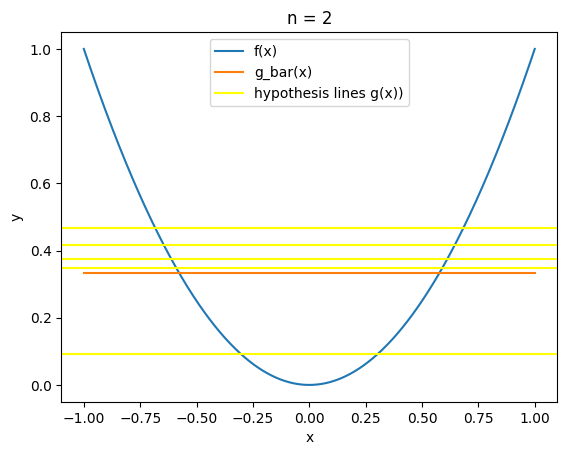

n:  5
variance:  0.017781554562524438
bias:  0.0890819139590238
Eout:  0.10686346852154824
bias+variance:  0.10686346852154824


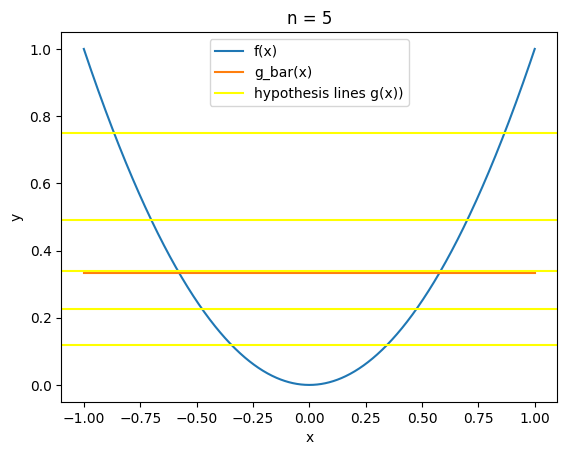

n:  10
variance:  0.008878755833368068
bias:  0.08935971737050648
Eout:  0.09823847320387454
bias+variance:  0.09823847320387455


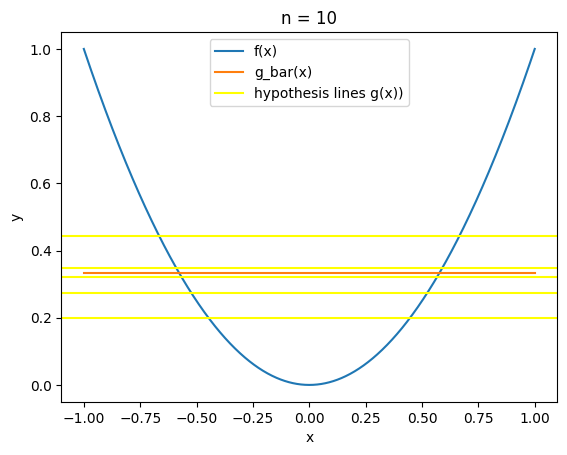

n:  20
variance:  0.00443086608775039
bias:  0.08926926417986311
Eout:  0.09370013026761351
bias+variance:  0.09370013026761351


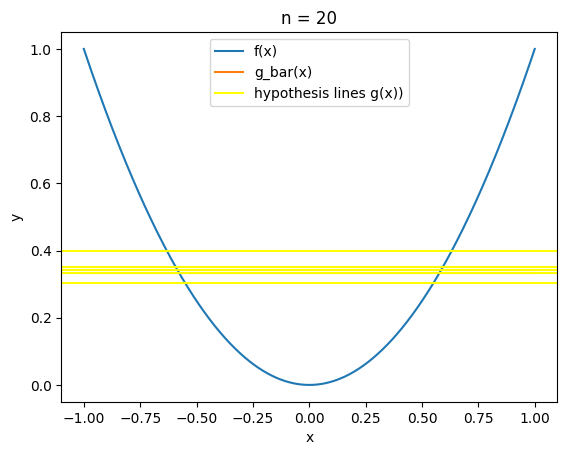

In [188]:
# TODO: Run experiment for quadratic hypothesis
n_points= [2,5,10,20]
nDataSamples = 1000

for n in n_points:
    print("n: ", n)
    x, y_all, g_bar_all,variance, bias, Eout =  run_numerical_experiment_quad(nDataSamples, n)
    print("variance: ", variance)
    print("bias: ", bias)
    print("Eout: ", Eout)
    print("bias+variance: ", bias+variance)
    
    plt.plot(x, y_all, label='f(x)')
    plt.plot(x, g_bar_all, label='g_bar(x)')
    # plot some hypothesis lines for visualization 
    for i in range(5):
        if i == 0:
            plt.axhline(y=gdFunc_quadratic(n), color='yellow', label='hypothesis lines g(x))')
        else:
            plt.axhline(y=gdFunc_quadratic(n), color='yellow')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('n = {}'.format(n))
    plt.legend()
    plt.show()


In [ ]:
# difference between analytical and numerical results is very small
# Eout is decrreasing as n increases
# simpler hypothesis h(x) = c gives lower variance and bias